## Data scraping
### Data scraping is the process of automatically extracting information from websites or online platforms, allowing users to collect large volumes of data quickly and efficiently. It is commonly used for purposes such as market research, sentiment analysis, and trend monitoring, enabling businesses and researchers to gain insights from diverse online sources

In [1]:
import praw  # Importing the PRAW library to interact with the Reddit API
from pprint import pprint  # Importing pprint for pretty-printing the output

# Set up Reddit instance with necessary credentials
reddit = praw.Reddit(client_id='G1z2OECDGhHSIb3EFerw_Q', 
                     client_secret='OmStT6YiFqnpRcKp8-ZBi373IG0Qow', 
                     user_agent='new_demo/0.1 by Competitive-Fan-1986')

# Select the subreddit 'wallstreetbets' to scrape data from
subreddit = reddit.subreddit('wallstreetbets')

# List to store the scraped data
scraped_data = []

# Scrape the top 20 hot posts from the subreddit
for post in subreddit.hot(limit=20):  # Loop through the top 20 hot posts
    scraped_data.append({
        'Title': post.title,              # Store the title of the post
        'Text': post.selftext,            # Store the full text of the post
        'Upvotes': post.score,             # Store the score (upvotes) of the post
        'Comments': post.num_comments      # Store the number of comments (engagement level)
    })

# Use pprint to display the scraped data in a formatted manner
pprint(scraped_data, width=100)  # Print the scraped data with a specified width for better readability


[{'Comments': 3968,
  'Text': '[View Post](https://sh.reddit.com/r/wallstreetbets/comments/1fupg48)',
  'Title': 'What Are Your Moves Tomorrow, October 03, 2024',
  'Upvotes': 138},
 {'Comments': 4528,
  'Text': 'I’d compare negotiations for this strike to be somewhere close to the Israel/Hamas '
          'ceasefire deal. Impractical stipulations that are unobtainable. The longer this goes on '
          'the worse this will get the worse it will be domestically and internationally. '
          'Implications unknown other than adding to already a basket of inflationary pressures. '
          'Grab your 🍿 we have front row seats to the shit show. 😅',
  'Title': 'Knee capping the supply chain like a bookie is straight gangster 😅',
  'Upvotes': 19738},
 {'Comments': 271,
  'Text': '',
  'Title': 'Nvidia just dropped a bombshell: Its new AI model is open, massive, and ready to rival '
           'GPT-4',
  'Upvotes': 3620},
 {'Comments': 101,
  'Text': '',
  'Title': 'Don’t ever be fooled

## Sentiment analysis
### Sentiment analysis is a natural language processing technique that involves determining the emotional tone behind a body of text, categorizing it as positive, negative, or neutral. It is widely used in various applications, including social media monitoring, customer feedback analysis, and market research, to gauge public opinion and inform decision-making.

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  # Importing the VADER sentiment analyzer
from pprint import pprint  # Importing pprint for pretty-printing the output

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores for a given text
def analyze_sentiment(text):
    return analyzer.polarity_scores(text)  # Return the sentiment scores (positive, negative, neutral, and compound)

# Add sentiment analysis to the scraped data
for post in scraped_data:  # Loop through each post in the scraped data
    title_sentiment = analyze_sentiment(post['Title'])  # Analyze the sentiment of the post title
    text_sentiment = analyze_sentiment(post['Text'])    # Analyze the sentiment of the post text
    
    # Add the sentiment scores to the post dictionary
    post['Title Sentiment'] = title_sentiment  # Store sentiment scores of the post title
    post['Text Sentiment'] = text_sentiment    # Store sentiment scores of the post text

# Pretty print the updated data with sentiment scores for better readability
pprint(scraped_data, width=100)  # Print the scraped data along with sentiment scores

[{'Comments': 3968,
  'Text': '[View Post](https://sh.reddit.com/r/wallstreetbets/comments/1fupg48)',
  'Text Sentiment': {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
  'Title': 'What Are Your Moves Tomorrow, October 03, 2024',
  'Title Sentiment': {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
  'Upvotes': 138},
 {'Comments': 4528,
  'Text': 'I’d compare negotiations for this strike to be somewhere close to the Israel/Hamas '
          'ceasefire deal. Impractical stipulations that are unobtainable. The longer this goes on '
          'the worse this will get the worse it will be domestically and internationally. '
          'Implications unknown other than adding to already a basket of inflationary pressures. '
          'Grab your 🍿 we have front row seats to the shit show. 😅',
  'Text Sentiment': {'compound': -0.0323, 'neg': 0.13, 'neu': 0.768, 'pos': 0.102},
  'Title': 'Knee capping the supply chain like a bookie is straight gangster 😅',
  'Title Sentiment': {'co

## Data Analysis

In [3]:
import re  # Importing the regular expressions module for text pattern matching
from pprint import pprint  # Importing pprint for pretty-printing the output

# Function to detect stock tickers using regex (stock tickers usually start with '$')
def find_stock_tickers(text):
    # Use regex to find all occurrences of words starting with '$'
    return re.findall(r'\$\w+', text)

# Add extracted key features to the scraped data
for post in scraped_data:  # Loop through each post in the scraped data
    # Calculate word count for title and text
    post['Title Length'] = len(post['Title'].split())  # Count the number of words in the title
    post['Text Length'] = len(post['Text'].split())    # Count the number of words in the text
    
    # Detect stock symbols in title and text by combining them
    post['Stock Symbols'] = find_stock_tickers(post['Title'] + ' ' + post['Text'])  # Extract stock tickers
    
    # Calculate an engagement score based on upvotes and comments
    post['Engagement Score'] = post['Upvotes'] + post['Comments']  # Sum of upvotes and comments

# Pretty print the updated data with extracted features for better readability
pprint(scraped_data, width=100)  # Print the scraped data along with the new features


[{'Comments': 3968,
  'Engagement Score': 4106,
  'Stock Symbols': [],
  'Text': '[View Post](https://sh.reddit.com/r/wallstreetbets/comments/1fupg48)',
  'Text Length': 2,
  'Text Sentiment': {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
  'Title': 'What Are Your Moves Tomorrow, October 03, 2024',
  'Title Length': 8,
  'Title Sentiment': {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
  'Upvotes': 138},
 {'Comments': 4528,
  'Engagement Score': 24266,
  'Stock Symbols': [],
  'Text': 'I’d compare negotiations for this strike to be somewhere close to the Israel/Hamas '
          'ceasefire deal. Impractical stipulations that are unobtainable. The longer this goes on '
          'the worse this will get the worse it will be domestically and internationally. '
          'Implications unknown other than adding to already a basket of inflationary pressures. '
          'Grab your 🍿 we have front row seats to the shit show. 😅',
  'Text Length': 63,
  'Text Sentiment': {'com

In [4]:
import yfinance as yf  # Importing the yfinance library to fetch stock data
from datetime import datetime, timedelta  # Importing datetime and timedelta for date manipulation
from pprint import pprint  # Importing pprint for pretty-printing the output

# Function to get stock price change for a symbol within the last 5 days
def get_stock_price_change(symbol):
    # Fetch the stock ticker from yfinance using the provided symbol
    ticker = yf.Ticker(symbol)
    
    # Define the date range for the last 5 days
    end_date = datetime.now()  # Current date
    start_date = end_date - timedelta(days=5)  # Date 5 days ago
    
    # Fetch historical stock data for the specified date range
    hist = ticker.history(start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
    
    # Calculate percentage price change from 5 days ago to today
    if not hist.empty:  # Check if historical data is available
        price_5_days_ago = hist['Close'].iloc[0]  # Closing price 5 days ago
        current_price = hist['Close'].iloc[-1]  # Current closing price
        # Calculate the percentage price change
        price_change = ((current_price - price_5_days_ago) / price_5_days_ago) * 100
        return round(price_change, 2)  # Return the change rounded to 2 decimal places
    return None  # Return None if no data is available

# Add stock price trends based on symbols extracted from posts
for post in scraped_data:  # Loop through each post in the scraped data
    stock_symbols = post['Stock Symbols']  # Get the list of stock symbols from the post
    price_trends = {}  # Dictionary to store price changes for each symbol
    
    for symbol in stock_symbols:  # Loop through each detected stock symbol
        stock_symbol = symbol.replace('$', '')  # Remove the $ sign from the symbol
        price_change = get_stock_price_change(stock_symbol)  # Fetch the stock price change
        
        # Store the price change if it's available
        if price_change is not None:
            price_trends[stock_symbol] = price_change  # Add to the price trends dictionary
    
    # Store the stock price changes in the post dictionary
    post['Stock Price Change (%)'] = price_trends

# Provide insights based on sentiment and stock price trend correlation
insights = []  # List to store insights based on analysis
for post in scraped_data:  # Loop through each post in the scraped data
    for symbol, price_change in post['Stock Price Change (%)'].items():  # Loop through each stock symbol and its price change
        sentiment_compound = post['Title Sentiment']['compound']  # Get the compound sentiment score from the title
        engagement = post['Engagement Score']  # Get the engagement score for the post
        
        # Example analysis logic to derive insights based on sentiment and price change
        if sentiment_compound > 0.5 and price_change > 0:  # Positive sentiment and price increase
            insight = f"Positive sentiment and stock price increase for {symbol}: {price_change}%."
        elif sentiment_compound < -0.5 and price_change < 0:  # Negative sentiment and price decrease
            insight = f"Negative sentiment and stock price decrease for {symbol}: {price_change}%."
        else:  # Mixed signals scenario
            insight = f"Mixed signals for {symbol}: Sentiment {sentiment_compound}, Price Change {price_change}%."
        
        insights.append(insight)  # Append the insight to the list

# Display insights with pretty print for better readability
pprint(insights)  # Print the derived insights


$3: possibly delisted; no timezone found
$10: possibly delisted; no timezone found
$30K: possibly delisted; no timezone found
$97: possibly delisted; no timezone found
$120: possibly delisted; no timezone found
$98K: possibly delisted; no timezone found


['Mixed signals for AMD: Sentiment 0.0, Price Change -2.62%.',
 'Mixed signals for TSLA: Sentiment 0.0, Price Change -4.82%.',
 'Mixed signals for RKLB: Sentiment 0.0, Price Change -0.21%.',
 'Mixed signals for SPY: Sentiment 0.0, Price Change -0.85%.',
 'Mixed signals for CRSR: Sentiment 0.0, Price Change -0.57%.',
 'Mixed signals for TSLA: Sentiment 0.4278, Price Change -4.82%.']


## Visualization

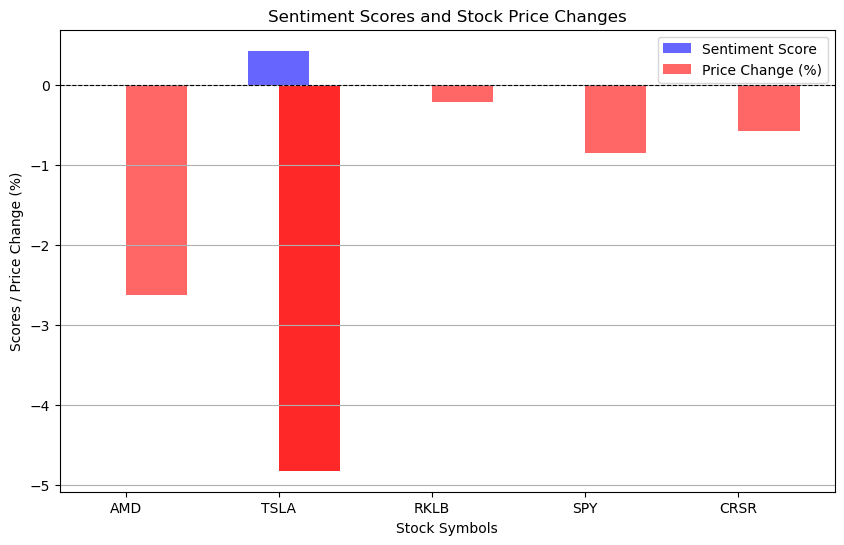

In [5]:
import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization
import re  # Importing regular expressions module for text pattern matching

# Prepare lists to hold the extracted data
symbols = []  # List to store stock symbols
sentiments = []  # List to store sentiment scores
price_changes = []  # List to store price changes

# Extract data using regex from the insights
for insight in insights:  # Loop through each insight
    # Use regex to find stock symbol, sentiment score, and price change from the insight text
    match = re.search(r'Mixed signals for (\w+): Sentiment ([\d.-]+), Price Change ([\d.-]+)%', insight)
    if match:  # If a match is found
        symbols.append(match.group(1))  # Append the stock symbol to the list
        sentiments.append(float(match.group(2)))  # Append the sentiment score (converted to float)
        price_changes.append(float(match.group(3)))  # Append the price change (converted to float)

# Set figure size for the plot
plt.figure(figsize=(10, 6))

# Create a bar chart for sentiment scores
plt.bar(symbols, sentiments, color='b', alpha=0.6, label='Sentiment Score', width=0.4, align='center')

# Create a second bar chart for price changes, aligning it with the edge of the first bars
plt.bar(symbols, price_changes, color='r', alpha=0.6, label='Price Change (%)', width=0.4, align='edge')

# Add labels and title to the plot
plt.xlabel('Stock Symbols')  # Label for the x-axis
plt.ylabel('Scores / Price Change (%)')  # Label for the y-axis
plt.title('Sentiment Scores and Stock Price Changes')  # Title of the plot

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Dashed line at y=0

plt.legend()  # Show the legend for the chart
plt.grid(axis='y')  # Add gridlines only for the y-axis

# Show the plot
plt.show()  # Display the chart